# Dataset Merging

Here we aim to merge the datasets together to clearly visualize relations between the features of each dataset

In [1]:
import pandas as pd

account = pd.read_csv('C:/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/AccountLevel.csv')
game = pd.read_csv('C:/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/GameLevel.csv')
seat = pd.read_csv('C:/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/SeatLevel.csv')

seat.shape

(493884, 5)

In [83]:
account_seat = pd.merge(account, seat, on='AccountNumber', how='inner')
account_seat['SingleGameTickets'].astype('category')
account_seat['PartialPlanTickets'].astype('category')
account_seat['SingleGameTickets'].astype('category')

account_seat.to_csv('C:/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/ALSL.csv', index = False)
# Choosing inner join result for these reasons: 
# 1. None of the merging methods resulted in any data lost so there is no lost data through using inner
# 2. The inner join helps visualize the intersecting datapoints, which is what we want the most to analyze 
account_seat

,Season_x,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,Season_y,Game,GameDate,GameTier
0,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low,2023,2024-01-24 Cleveland Cavaliers,2024-01-24,D
1,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low,2023,2024-01-24 Cleveland Cavaliers,2024-01-24,D
2,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low,2023,2024-01-24 Cleveland Cavaliers,2024-01-24,D
3,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low,2023,2024-01-24 Cleveland Cavaliers,2024-01-24,D
4,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low,2023,2024-01-24 Cleveland Cavaliers,2024-01-24,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531336,2024,15667,0,0,0,1,144.0,0,G,10.0,385.0,Medium,2024,2025-04-10 New Orleans Pelicans,2025-04-10,D
531337,2024,15667,0,0,0,1,144.0,0,G,10.0,385.0,Medium,2024,2025-04-08 Minnesota Timberwolves,2025-04-08,B
531338,2024,15667,0,0,0,1,144.0,0,G,10.0,385.0,Medium,2024,2025-04-08 Minnesota Timberwolves,2025-04-08,B
531339,2024,15667,0,0,0,1,144.0,0,G,10.0,385.0,Medium,2024,2025-04-08 Minnesota Timberwolves,2025-04-08,B


### Data Visualization
##### AccountLevel x SeatLevel
###### Games Attended by Fan Segment

<Axes: xlabel='FanSegment'>

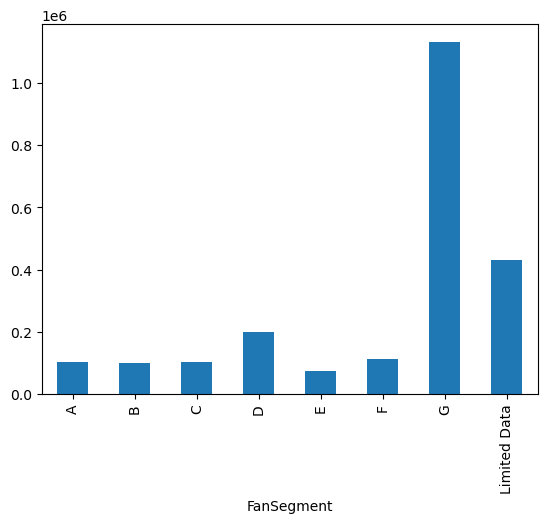

In [65]:
d = account_seat.groupby('FanSegment')['GamesAttended'].sum()
d.plot(kind='bar')

<Axes: xlabel='FanSegment'>

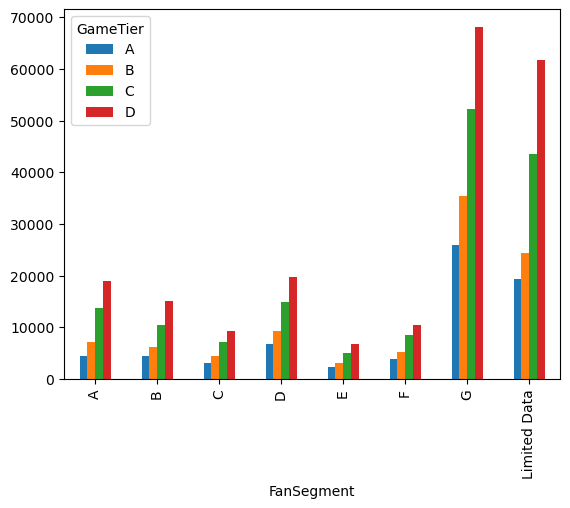

In [67]:
f = account_seat.groupby(['FanSegment', 'GameTier']).size().unstack()

f.plot(kind='bar')

<Axes: xlabel='GameTier'>

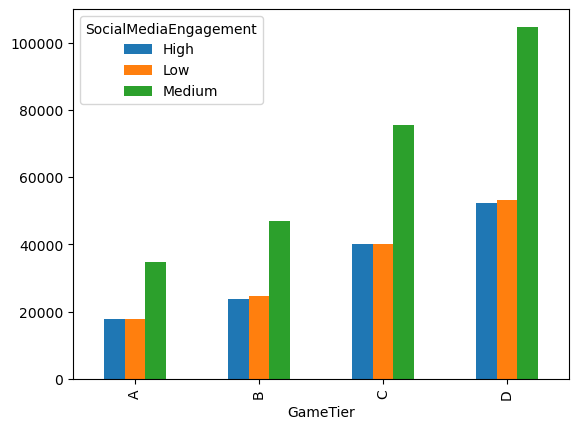

In [68]:
e = account_seat.groupby(['GameTier', 'SocialMediaEngagement']).size().unstack()
e.plot(kind='bar')

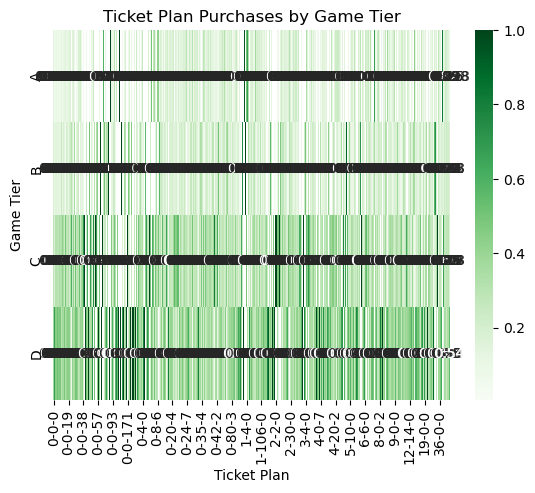

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

table = pd.pivot_table(account_seat, index=['GameTier'], columns=['SingleGameTickets', 'PartialPlanTickets', 'GroupTickets'], aggfunc = 'size')

table = table.div(table.sum(axis=0), axis=1)

g = account_seat.groupby(

sns.heatmap(table, annot=True, cmap='Greens',cbar=True)

plt.title('Ticket Plan Purchases by Game Tier')
plt.xlabel('Ticket Plan')
plt.ylabel('Game Tier')
plt.show()
